In [1]:
# This practice sheet is done following the processes described in the book:
# Chapter 1: Foundational Methods

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd
import torch
import seaborn as sns

In [3]:
torch_scalar = torch.tensor(3)
torch_vector = torch.tensor([1, 2, 3])
torch_matrix = torch.tensor([
                             [1,2,3],
                             [1,2,3],
                             [1,2,3]
                             ])
torch_tensor3d = torch.tensor([
                               [
                                [1,1],
                                [1,2]
                               ],
                               [
                                [2,1],
                                [2,2]
                               ],
                               [
                                [3,1],
                                [3,2]
                               ]
                              ])

In [4]:
print (f"Scalar shape: {torch_scalar.shape}")
print (f"Vector shape: {torch_vector.shape}")
print (f"Matrix shape: {torch_matrix.shape}")
print (f"Volume shape: {torch_tensor3d.shape}")

Scalar shape: torch.Size([])
Vector shape: torch.Size([3])
Matrix shape: torch.Size([3, 3])
Volume shape: torch.Size([3, 2, 2])


In [5]:
x_np = np.random.random((4,4))
print (x_np)

[[0.54424519 0.06644643 0.90920375 0.90083389]
 [0.92546043 0.81910563 0.83979825 0.15647739]
 [0.67789805 0.56067067 0.44024372 0.49120373]
 [0.77862965 0.35473887 0.79967593 0.19991181]]


In [6]:
x_pt = torch.tensor(x_np)
print (x_pt)

tensor([[0.5442, 0.0664, 0.9092, 0.9008],
        [0.9255, 0.8191, 0.8398, 0.1565],
        [0.6779, 0.5607, 0.4402, 0.4912],
        [0.7786, 0.3547, 0.7997, 0.1999]], dtype=torch.float64)


In [7]:
print (x_np.dtype, x_pt.dtype)

float64 torch.float64


In [8]:
x_np = np.asarray(x_np, dtype = np.float32)
x_pt = torch.tensor(x_np, dtype = torch.float32)

print (x_np.dtype, x_pt.dtype)

float32 torch.float32


In [9]:
# Masks
b_np = (x_np > 0.5)
print (b_np)
print (b_np.dtype)

[[ True False  True  True]
 [ True  True  True False]
 [ True  True False False]
 [ True False  True False]]
bool


In [10]:
b_pt = (x_pt > 0.5)
print (b_pt)
print (b_pt.dtype)

tensor([[ True, False,  True,  True],
        [ True,  True,  True, False],
        [ True,  True, False, False],
        [ True, False,  True, False]])
torch.bool


In [11]:
print (np.sum(x_np))
print (torch.sum(x_pt))

9.464543
tensor(9.4645)


In [12]:
print (np.transpose(x_np))
print (torch.transpose(x_pt,0,1))

[[0.5442452  0.92546046 0.67789805 0.77862966]
 [0.06644643 0.8191056  0.5606707  0.35473886]
 [0.90920377 0.8397983  0.44024372 0.79967594]
 [0.9008339  0.15647739 0.49120373 0.1999118 ]]
tensor([[0.5442, 0.9255, 0.6779, 0.7786],
        [0.0664, 0.8191, 0.5607, 0.3547],
        [0.9092, 0.8398, 0.4402, 0.7997],
        [0.9008, 0.1565, 0.4912, 0.1999]])


In [13]:
# GPU acceleration

import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [14]:
print ("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


In [15]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number = 100)

In [16]:
print (f"CPU time is : {time_cpu}.")
print (f"GPU time is : {time_gpu}.")

CPU time is : 8.3117714.
GPU time is : 1.8531834000000007.


In [17]:
%%time
# NOTE: GPU acceleration on tensor calculation requires all tensors to be on GPU memory

x = torch.rand(2**11,2**11).to(device)
y = torch.rand(2**11,1).to(device)
z = x*y

CPU times: total: 1.48 s
Wall time: 1.91 s


In [18]:
%%time

x = torch.rand(2**11,2**11)
y = torch.rand(2**11,1)
z = x*y

CPU times: total: 15.6 ms
Wall time: 12.2 ms


In [19]:
# Error: matrix in seperate memory

# x = torch.rand(2**11,2**11).to(device)
# y = torch.rand(2**11,1)
# x*y

In [20]:
# Converting to NumPy array requires the matrix to be on host memory

# Error: .numpy() needs the matrix to be on host memory

# x = torch.rand(128,128).to(device)
# x_np = x.numpy()

In [21]:
x_np = x.cpu().numpy()
print (x_np)

[[0.12592775 0.49781138 0.5913721  ... 0.20945299 0.09007263 0.7768526 ]
 [0.8740909  0.91183776 0.95156693 ... 0.24510199 0.7883028  0.9530341 ]
 [0.12025249 0.62923616 0.81091934 ... 0.15343767 0.01706022 0.37059253]
 ...
 [0.9660728  0.551318   0.4628064  ... 0.04094446 0.0725469  0.8659847 ]
 [0.6954642  0.74838847 0.4843853  ... 0.34312606 0.12768328 0.47784764]
 [0.8837443  0.22019732 0.38189095 ... 0.11124837 0.86343277 0.8887049 ]]


In [22]:
def moveTo(obj, device):
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        
        return to_ret
    
    elif hasattr(obj, "to"):
        return obj.to(device)
    
    else:
        return obj
    
some_tensor = [torch.tensor(1), torch.tensor(2)]

print(some_tensor)
print(moveTo(some_tensor, device))

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


<AxesSubplot:>

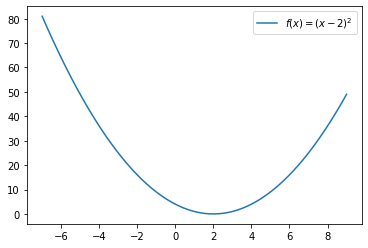

In [23]:
## Auto-derivatives with Pytorch

def f(x):
    return torch.pow((x-2.0),2)

x_axis_vals = np.linspace(-7,9,100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')

<AxesSubplot:>

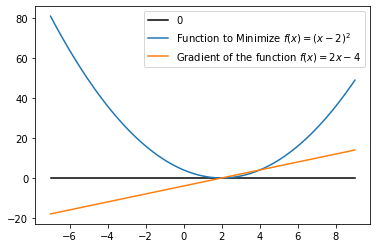

In [24]:
def fP(x):
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

sns.lineplot (x=x_axis_vals, y=[0.0]*len(x_axis_vals), label='0',color='black')
sns.lineplot (x=x_axis_vals, y=y_axis_vals, label='Function to Minimize $f(x) = (x-2)^2$')
sns.lineplot (x=x_axis_vals, y=y_axis_vals_p, label="Gradient of the function $f(x)=2 x - 4$")

In [25]:
x = torch.tensor([-3.5], requires_grad=True)
print (x.grad)

None


In [26]:
value=f(x)
print (value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [27]:
value.backward()
print(x.grad)

tensor([-11.])


In [28]:
x = torch.tensor([-3.5], requires_grad=True)
x_cur = x.clone()
x_prev = x_cur*100

epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone()
    value = f(x)
    value.backward()
    x.data -= eta*x.grad
    x.grad.zero_()
    x_cur = x.data
    
print(x_cur)


tensor([2.0000])


In [29]:
x_param = torch.nn.Parameter(torch.tensor([-3.5], requires_grad = True))
optimizer = torch.optim.SGD([x_param], lr=eta)

In [30]:
for epoch in range(60):
    optimizer.zero_grad()
    loss_incurred = f(x_param)
    loss_incurred.backward()
    optimizer.step()

print(x_param.data)

tensor([2.0000])


In [31]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

In [32]:
X, y = fetch_openml ('mnist_784', version=1, return_X_y=True)
print (X.shape)

(70000, 784)


In [33]:
class SimpleDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        inputs = torch.tensor(self.X.loc[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y.loc[index]), dtype=torch.int64)
        return inputs, targets
    
    def __len__(self):
        return self.X.shape[0]

In [34]:
dataset = SimpleDataset(X,y)

In [35]:
print(f"Length: {len(dataset)}")
example, label = dataset[0]
print(f"Features: {example.shape}")
print(f"Label of index 0: {label}")

Length: 70000
Features: torch.Size([784])
Label of index 0: 5


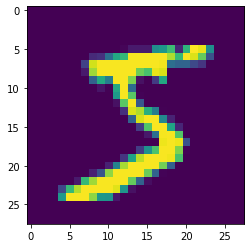

In [36]:
plt.imshow(example.reshape((28,28)))

In [37]:
train_size = int(len(dataset)*0.7)
test_size = int((len(dataset)-train_size)/2)
val_size = test_size

train_set, test_set, val_set = torch.utils.data.random_split(dataset, (train_size, test_size, val_size))

print(f"Train set size: {len(train_set)}.")
print(f"Test set size: {len(test_set)}.")
print(f"Validation set size: {len(val_set)}.")

Train set size: 49000.
Test set size: 10500.
Validation set size: 10500.
